# Shelter Animal Outcomes
Todos os anos, aproximadamente 7,6 milhões de animais de companhia acabam em abrigos nos Estados Unidos. Muitos animais são abandonados como indesejados por seus donos, enquanto outros são recolhidos depois de se perderem ou serem retirados de situações de crueldade. Muitos desses animais encontram famílias eternas para levá-los para casa, mas muitos não têm tanta sorte. 2,7 milhões de cães e gatos são sacrificados nos EUA todos os anos.


Usando um conjunto de dados de informações de ingestão, incluindo raça, cor, sexo e idade do Austin Animal Center, estamos pedindo aos Kagglers que prevejam o resultado para cada animal.


Também acreditamos que este conjunto de dados pode nos ajudar a entender as tendências nos resultados dos animais. Essas percepções podem ajudar os abrigos a concentrar sua energia em animais específicos que precisam de uma ajudinha extra para encontrar um novo lar

Mais informações: https://www.kaggle.com/c/shelter-animal-outcomes


## Por que esse dataset?

O motivo é bem simples, na nossa materia de projetos que estamos tendo, o projeto é fazer um app mobile ou um web responsivo com tematica livre, nosso grupo decidiu fazer um app mobile com tema de adoçao de animais, e conforme o projeto foi se desenrolando, decidimos unir o util ao agradavel, aproveitando a oportunidade de fazer um modelo de ML, decidimos pegar um dataset de animais para em futuras atualizaçoes, o app ter um sistema de recomendação e classificaçao 

### Colaboradores 
2218107801 CARLOS HENRIQUE SOUSA GOMES DA HORA


2214203783 MAYARA MELO GONÇALVES


2218106653 VITOR DANIEL BENEDITO SANTO

2218104108 WILIAN NASCIMENTO DA SILVA




### Leitura de dados com pandas

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_train = pd.read_csv('train.csv', parse_dates = ['DateTime'])
#test = pd.read_csv('test.csv', parse_dates = ['DateTime'])

In [3]:
df_train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


### Manipulação e limpeza de dados com pandas

In [4]:
df_train['Porte'] = np.random.randint(0,5, size=len(df_train))
df_train['Temperamento']=np.random.randint(0,3,size=len(df_train))

In [5]:
df_train['Porte'] = df_train['Porte'].astype(str)
df_train['Porte'] = df_train['Porte'].str.replace('0','Mini')
df_train['Porte'] = df_train['Porte'].str.replace('1','Small')
df_train['Porte'] = df_train['Porte'].str.replace('2','Medium')
df_train['Porte'] = df_train['Porte'].str.replace('3','Large')
df_train['Porte'] = df_train['Porte'].str.replace('4','Giant')

In [6]:
df_train['Temperamento'] = df_train['Temperamento'].astype(str)
df_train['Temperamento'] = df_train['Temperamento'].str.replace('0','Calm')
df_train['Temperamento'] = df_train['Temperamento'].str.replace('1','Reserved')
df_train['Temperamento'] = df_train['Temperamento'].str.replace('2','Bustling')

In [7]:
df_train.isnull().sum()
df_train.apply(lambda x: sum(x.isnull()/len(df_train)))

AnimalID          0.000000
Name              0.287740
DateTime          0.000000
OutcomeType       0.000000
OutcomeSubtype    0.509260
AnimalType        0.000000
SexuponOutcome    0.000037
AgeuponOutcome    0.000673
Breed             0.000000
Color             0.000000
Porte             0.000000
Temperamento      0.000000
dtype: float64

In [8]:
df_train['Name'].fillna(0, inplace = True)

In [9]:
df_train['HasName'] = (df_train['Name'] != 0).astype(str)

In [10]:
df_train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
Porte                     object
Temperamento              object
HasName                   object
dtype: object

In [11]:
df_train['Year'] = df_train['DateTime'].dt.year
df_train['Month'] = df_train['DateTime'].dt.month
df_train['Day'] = df_train['DateTime'].dt.day
df_train['Hour'] = df_train['DateTime'].dt.hour
df_train['WeekDay'] = df_train['DateTime'].dt.weekday
df_train['Min'] = df_train['DateTime'].dt.minute
df_train['Week'] = df_train['DateTime'].dt.week

In [12]:
df_train['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [13]:
df_train = df_train.drop(['AnimalID','Name','DateTime','OutcomeSubtype'], axis = 1)

In [14]:
def Age(x):
    if pd.isnull(x):
        return -1
    num = int(x.split(' ')[0])
    
    if 'year' in x:
        return num * 365
    elif 'month' in x:
        return num * 30
    elif 'week' in x:
        return num * 7
    else:
        return num

In [15]:
df_train['AgeuponOutcome'] = df_train['AgeuponOutcome'].apply(Age)

In [16]:
df_train['AgeuponOutcome'].unique()

array([ 365,  730,   21,   30,  150, 1460,   90,   14,   60,  300,  180,
       1825, 2555, 1095,  120, 4380, 3285, 2190,    7, 4015,   28,  210,
       2920,  330,    4,  270,  240, 5475, 3650,    0, 5110,    3,    6,
          5,   35,    2, 5840,    1, 4745,   -1, 6205, 6570, 6935, 7300],
      dtype=int64)

In [17]:
df_train

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Porte,Temperamento,HasName,Year,Month,Day,Hour,WeekDay,Min,Week
0,Return_to_owner,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,Small,Bustling,True,2014,2,12,18,2,22,7
1,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,Medium,Calm,True,2013,10,13,12,6,44,41
2,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,Mini,Calm,True,2015,1,31,12,5,28,5
3,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,Small,Calm,False,2014,7,11,19,4,9,28
4,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,Large,Calm,False,2013,11,15,12,4,52,46
5,Transfer,Dog,Intact Female,30,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Mini,Calm,True,2014,4,25,13,4,4,17
6,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Tabby,Medium,Bustling,True,2015,3,28,13,5,11,13
7,Transfer,Cat,Unknown,21,Domestic Shorthair Mix,Brown Tabby,Small,Reserved,False,2015,4,30,17,3,2,18
8,Adoption,Dog,Spayed Female,150,American Pit Bull Terrier Mix,Red/White,Giant,Reserved,True,2014,2,4,17,1,17,6
9,Adoption,Dog,Spayed Female,365,Cairn Terrier,White,Mini,Calm,False,2014,5,3,7,5,48,18


In [18]:
df_train['MultiColors'] = df_train['Color'].apply(lambda x: True if '/' in x else False)
df_train['MultiColors'].tail()

26724     True
26725    False
26726     True
26727    False
26728     True
Name: MultiColors, dtype: bool

In [19]:
df_train['BreedType'] = df_train.Breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand = False).str.lower().fillna('pure')

In [20]:
df_train = df_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_train.apply(lambda x: sum(x.isnull()/len(df_train)))

OutcomeType       0.0
AnimalType        0.0
SexuponOutcome    0.0
AgeuponOutcome    0.0
Breed             0.0
Color             0.0
Porte             0.0
Temperamento      0.0
HasName           0.0
Year              0.0
Month             0.0
Day               0.0
Hour              0.0
WeekDay           0.0
Min               0.0
Week              0.0
MultiColors       0.0
BreedType         0.0
dtype: float64

In [21]:
df_train.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Porte,Temperamento,HasName,Year,Month,Day,Hour,WeekDay,Min,Week,MultiColors,BreedType
0,Return_to_owner,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,Small,Bustling,True,2014,2,12,18,2,22,7,True,mix
1,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,Medium,Calm,True,2013,10,13,12,6,44,41,False,mix
2,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,Mini,Calm,True,2015,1,31,12,5,28,5,True,mix
3,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,Small,Calm,False,2014,7,11,19,4,9,28,False,mix
4,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,Large,Calm,False,2013,11,15,12,4,52,46,False,pure


In [22]:
print(df_train.nunique())

OutcomeType          5
AnimalType           2
SexuponOutcome       5
AgeuponOutcome      44
Breed             1380
Color              366
Porte                5
Temperamento         3
HasName              2
Year                 4
Month               12
Day                 31
Hour                20
WeekDay              7
Min                 60
Week                53
MultiColors          2
BreedType            2
dtype: int64


In [23]:
df_train.dtypes

OutcomeType       object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome     int64
Breed             object
Color             object
Porte             object
Temperamento      object
HasName           object
Year               int64
Month              int64
Day                int64
Hour               int64
WeekDay            int64
Min                int64
Week               int64
MultiColors         bool
BreedType         object
dtype: object

In [24]:
df_train = df_train.drop(['Breed','Color'], axis = 1)

In [25]:
df_train['MultiColors'] = df_train['MultiColors'].astype(str)

### Descritivo e exploração de dados com pandas (groupbys)

In [26]:
group_per_type = list(df_train.groupby(df_train['AnimalType'].head()))
group_per_type

[('Cat',
    OutcomeType AnimalType SexuponOutcome  AgeuponOutcome   Porte Temperamento  \
  1  Euthanasia        Cat  Spayed Female             365  Medium         Calm   
  3    Transfer        Cat    Intact Male              21   Small         Calm   
  
    HasName  Year  Month  Day  Hour  WeekDay  Min  Week MultiColors BreedType  
  1    True  2013     10   13    12        6   44    41       False       mix  
  3   False  2014      7   11    19        4    9    28       False       mix  ),
 ('Dog',        OutcomeType AnimalType SexuponOutcome  AgeuponOutcome  Porte  \
  0  Return_to_owner        Dog  Neutered Male             365  Small   
  2         Adoption        Dog  Neutered Male             730   Mini   
  4         Transfer        Dog  Neutered Male             730  Large   
  
    Temperamento HasName  Year  Month  Day  Hour  WeekDay  Min  Week  \
  0     Bustling    True  2014      2   12    18        2   22     7   
  2         Calm    True  2015      1   31    12      

In [27]:
group_per_sex = list(df_train.groupby(df_train['SexuponOutcome'].head()))
group_per_sex

[('Intact Male',
    OutcomeType AnimalType SexuponOutcome  AgeuponOutcome  Porte Temperamento  \
  3    Transfer        Cat    Intact Male              21  Small         Calm   
  
    HasName  Year  Month  Day  Hour  WeekDay  Min  Week MultiColors BreedType  
  3   False  2014      7   11    19        4    9    28       False       mix  ),
 ('Neutered Male',
         OutcomeType AnimalType SexuponOutcome  AgeuponOutcome  Porte  \
  0  Return_to_owner        Dog  Neutered Male             365  Small   
  2         Adoption        Dog  Neutered Male             730   Mini   
  4         Transfer        Dog  Neutered Male             730  Large   
  
    Temperamento HasName  Year  Month  Day  Hour  WeekDay  Min  Week  \
  0     Bustling    True  2014      2   12    18        2   22     7   
  2         Calm    True  2015      1   31    12        5   28     5   
  4         Calm   False  2013     11   15    12        4   52    46   
  
    MultiColors BreedType  
  0        True       m

In [28]:
group_per_outcome = list(df_train.groupby(df_train['OutcomeType'].head()))
group_per_outcome

[('Adoption',
    OutcomeType AnimalType SexuponOutcome  AgeuponOutcome Porte Temperamento  \
  2    Adoption        Dog  Neutered Male             730  Mini         Calm   
  
    HasName  Year  Month  Day  Hour  WeekDay  Min  Week MultiColors BreedType  
  2    True  2015      1   31    12        5   28     5        True       mix  ),
 ('Euthanasia',
    OutcomeType AnimalType SexuponOutcome  AgeuponOutcome   Porte Temperamento  \
  1  Euthanasia        Cat  Spayed Female             365  Medium         Calm   
  
    HasName  Year  Month  Day  Hour  WeekDay  Min  Week MultiColors BreedType  
  1    True  2013     10   13    12        6   44    41       False       mix  ),
 ('Return_to_owner',
         OutcomeType AnimalType SexuponOutcome  AgeuponOutcome  Porte  \
  0  Return_to_owner        Dog  Neutered Male             365  Small   
  
    Temperamento HasName  Year  Month  Day  Hour  WeekDay  Min  Week  \
  0     Bustling    True  2014      2   12    18        2   22     7   
  

### Figuras que mostrem insights sobre os dados com seaborn e matplotlib

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

### Analisando as variaveis de maneira individual 

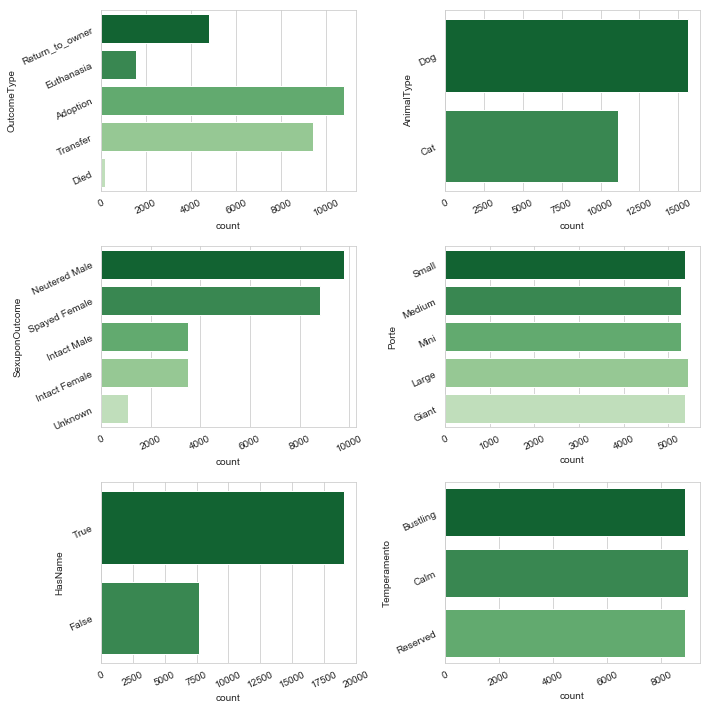

In [30]:
fig,ax =  plt.subplots(3, 2, figsize = (10, 10))

ax[0][0].tick_params(labelrotation = 25)
sns.countplot(y = 'OutcomeType',
              data = df_train,
              ax = ax[0][0])
  
ax[0][1].tick_params(labelrotation = 25)
sns.countplot(y = 'AnimalType',
              data = df_train,
              ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.countplot(y = 'SexuponOutcome',
              data = df_train,
              ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Porte',
              data = df_train,
              ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.countplot(y = 'HasName',
              data = df_train,
              ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Temperamento',
              data = df_train,
              ax = ax[2][1])
  
fig.tight_layout(pad = 1.2)

A maior parte do animais foram foram transferidos ou adotados

A maioria é cachorro

Independente do genero ou tipo de animal, a maioria foi castrado

Nao ha um tamanho de animal que se sobresai sobre os outros

Grande parte tem nome

Não ha um temperamento que se destaque

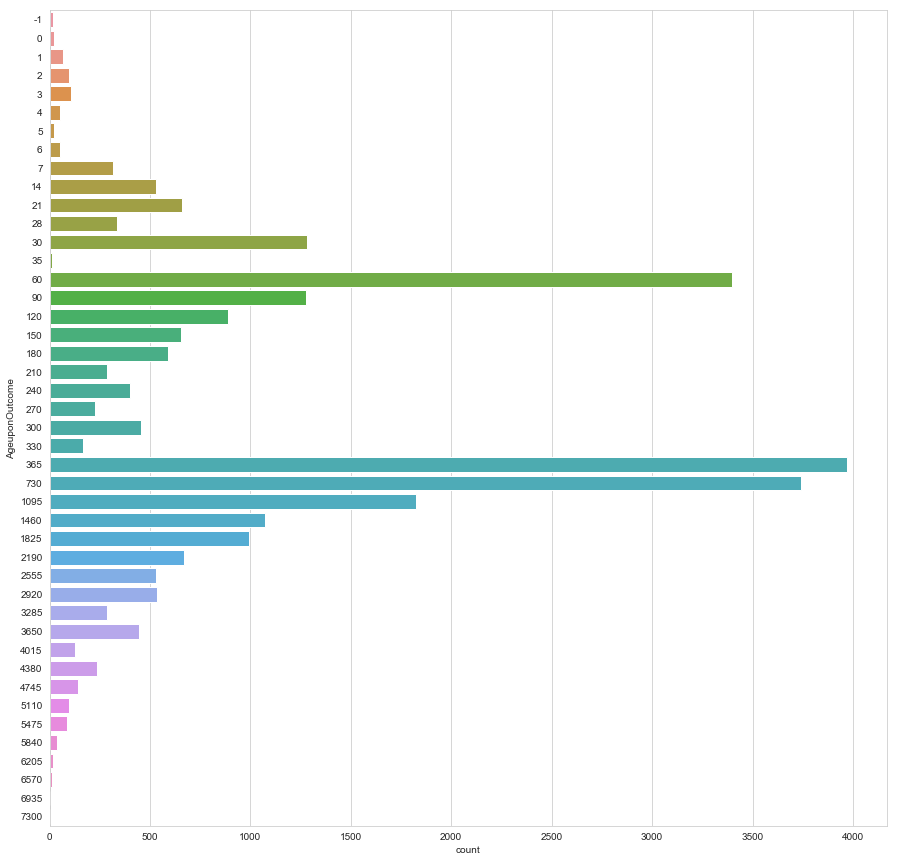

In [31]:
plt.figure(figsize=(15,15))
sns.countplot(y= df_train['AgeuponOutcome'])

Mais de 70% dos animais possui idade igual ou inferior ha 2 anos

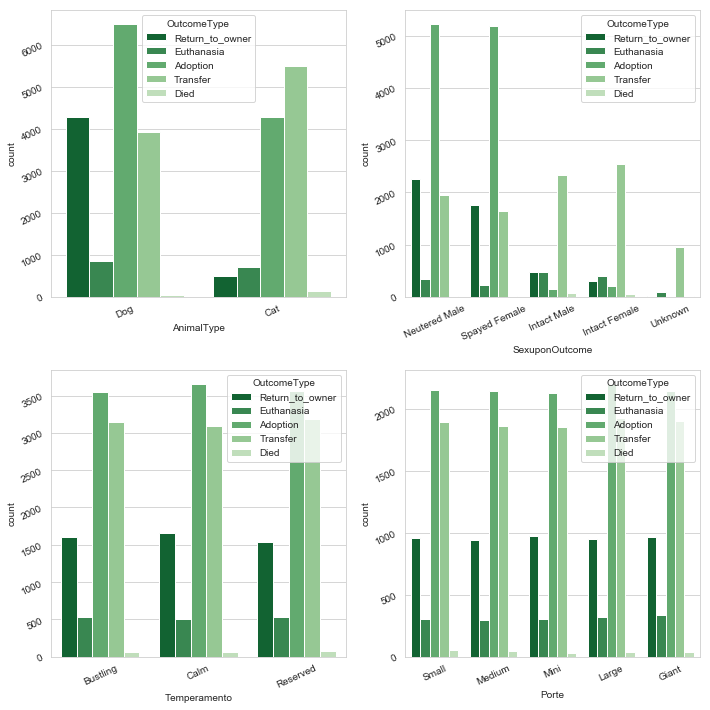

In [32]:
fig,ax =  plt.subplots(2, 2, figsize = (10, 10))
  
ax[0][0].tick_params(labelrotation = 25)
sns.countplot(x='AnimalType', hue = 'OutcomeType',
              data = df_train,
              ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.countplot(x= 'SexuponOutcome', hue = 'OutcomeType',
              data = df_train,
              ax = ax[0][1])
  
ax[1][0].tick_params(labelrotation = 25)
sns.countplot(x= 'Temperamento',hue = 'OutcomeType',
              data = df_train,
              ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.countplot(x= 'Porte',hue = 'OutcomeType',
              data = df_train,
              ax = ax[1][1])

fig.tight_layout(pad = 1.2)

GRAFICO 1,1 - As pessoas tem preferencia maior para adoção de cachorros. A maioria dos gatos sao transferidos

GRAFICO 1,2 - O publico tem preferencia por animais castrados, independente do genero. Os nao castrados ou desconhecidos, em sua maioria são transferidos 

GRAFICO 2,1 - Nao importa qual seja a personalidade do animal. Não ha preferencia nesse caso para adoção

GRAFICO 2,2 - Tamanho é sempre um detalhe importante, mas nesse caso o publico tem uma leve preferencia por cachorro de porte pequeno ou mini

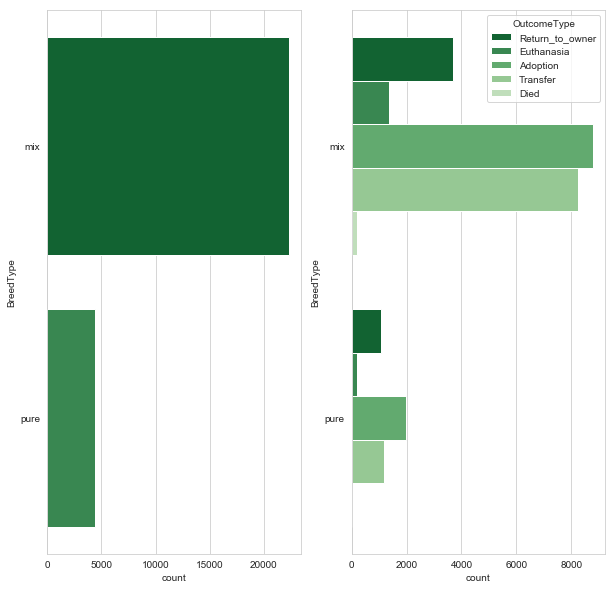

In [33]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y = 'BreedType', data= df_train, ax = ax[0])
sns.countplot(y = 'BreedType', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

A maioria das dos animais são de raças misturas e consequentemente o publico tem prefencia por animais com raça misturada

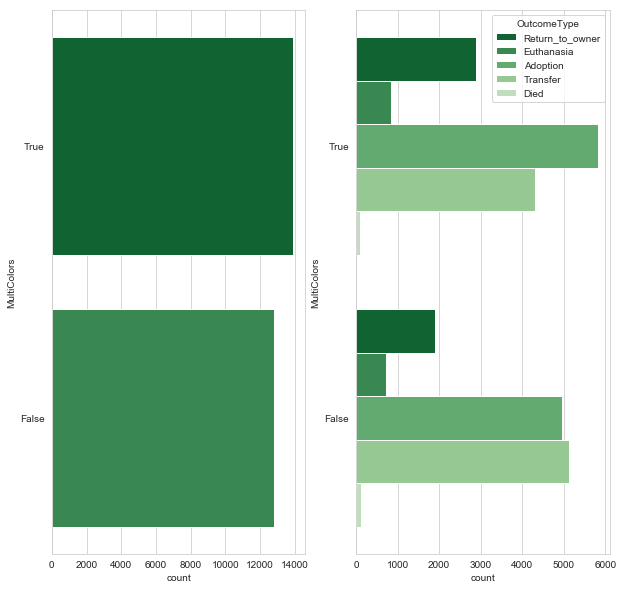

In [34]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y = 'MultiColors', data= df_train, ax = ax[0])
sns.countplot(y = 'MultiColors', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

A maioria dos animais possuem mais de uma cor, animais de cor unica tem chances quase 50/50 de serem transferidos ou adotados

Animais de mais de uma cor tem maior probabilidade para adoção

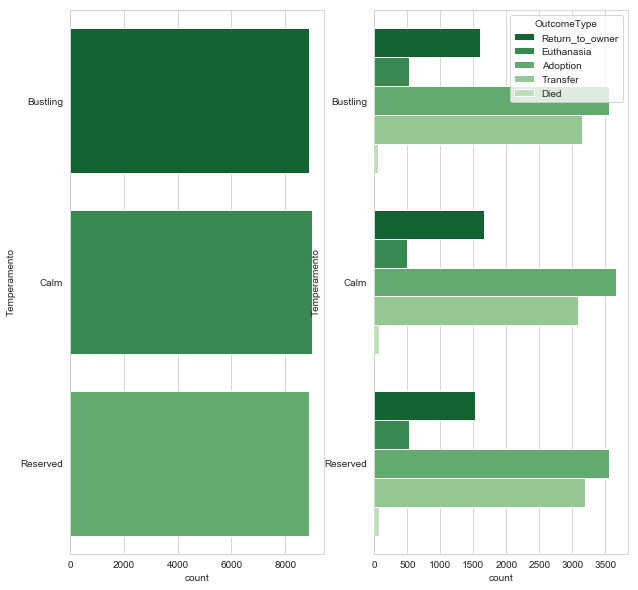

In [35]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y = 'Temperamento', data= df_train, ax = ax[0])
sns.countplot(y = 'Temperamento', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

Variavel criada de forma aleatoria, entao seu valores sao quase identicos, quase nada a declarar

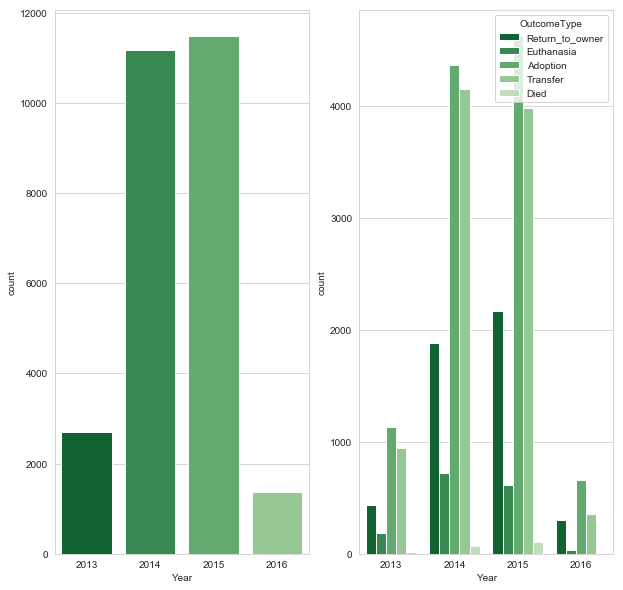

In [36]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(x= 'Year', data= df_train, ax = ax[0])
sns.countplot(x= 'Year', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

2014 e 15 são os anos que mais tem registros nos dados, e consequentemente são os anos que mais se teve adoção de animais

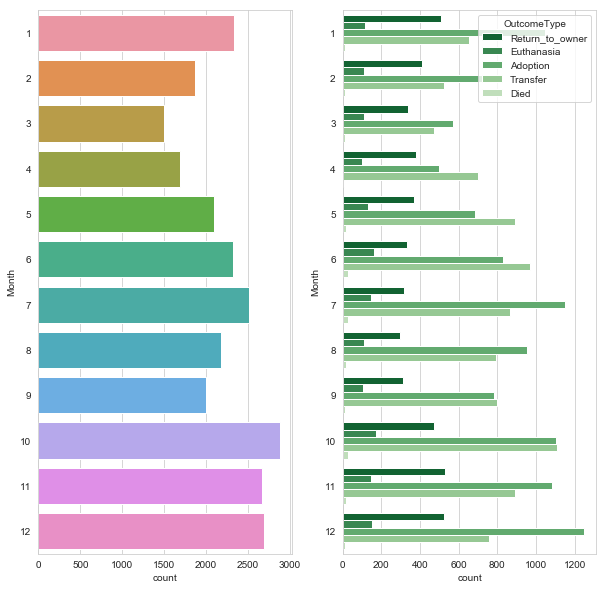

In [37]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'Month', data= df_train, ax = ax[0])
sns.countplot(y= 'Month', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

No periodo Outubro-Janeiro é onde se tem mais registros de animais 

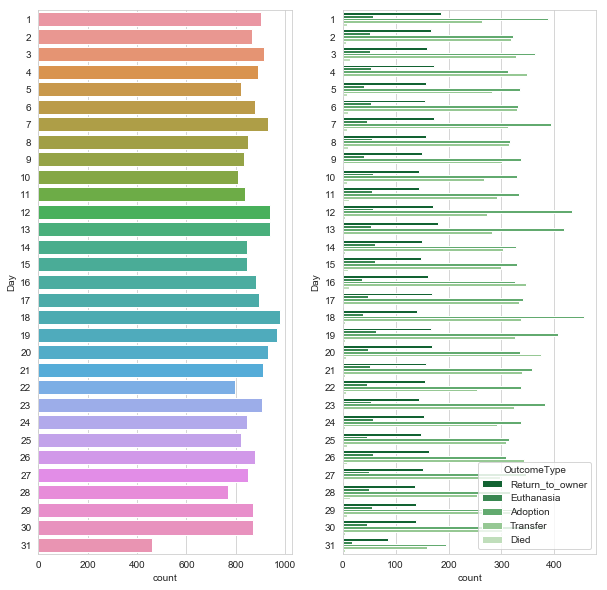

In [38]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'Day', data= df_train, ax = ax[0])
sns.countplot(y= 'Day', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

Do meio pro final do mes, é onde parece haver mais movimentaçao de animais, exceto no dia 31

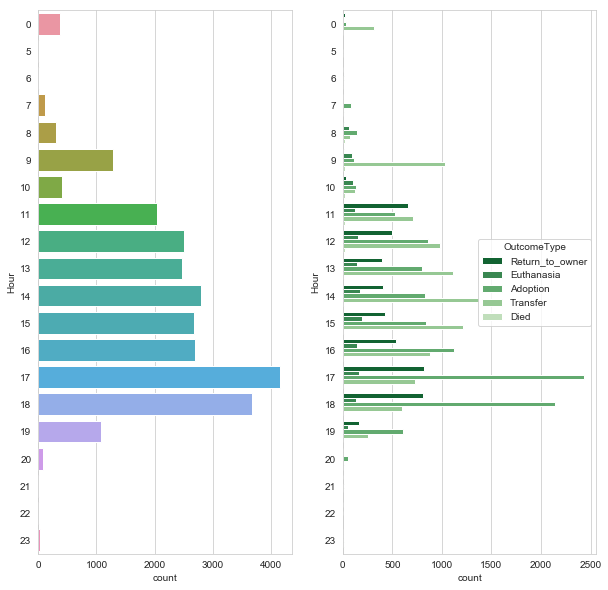

In [39]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'Hour', data= df_train, ax = ax[0])
sns.countplot(y= 'Hour', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

E para surpresa de 0 pessoas, as horas do periodo da tarde acumulam grande parte dos dados, até porque dificilmente um lugar para adoção ta aberto à noite e quase ninguem vai adotar um animal de manhã 

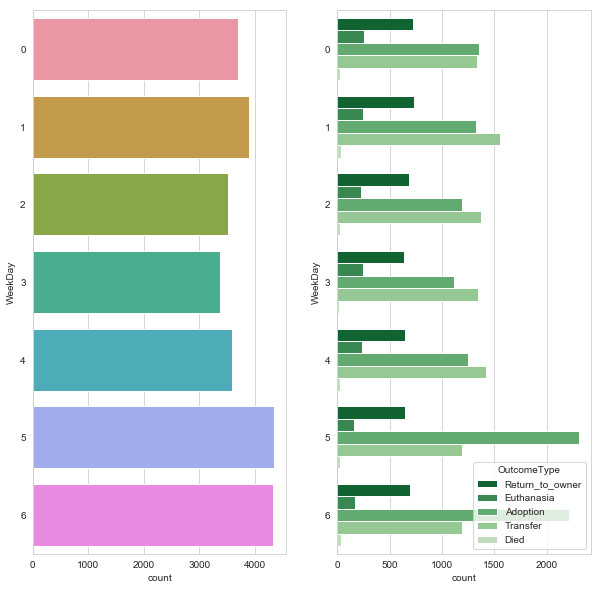

In [40]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'WeekDay', data= df_train, ax = ax[0])
sns.countplot(y= 'WeekDay', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

Sexta e sábado são os dias que mais rola adoção e observe que a segunda é onde mais rola transferencias 

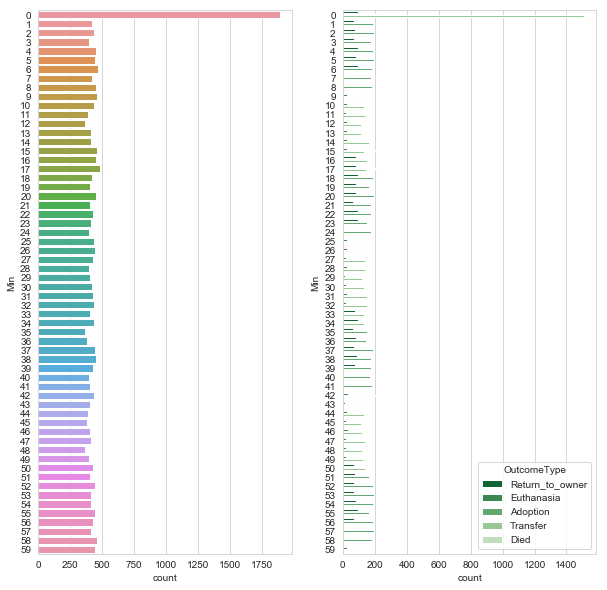

In [41]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'Min', data= df_train, ax = ax[0])
sns.countplot(y= 'Min', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

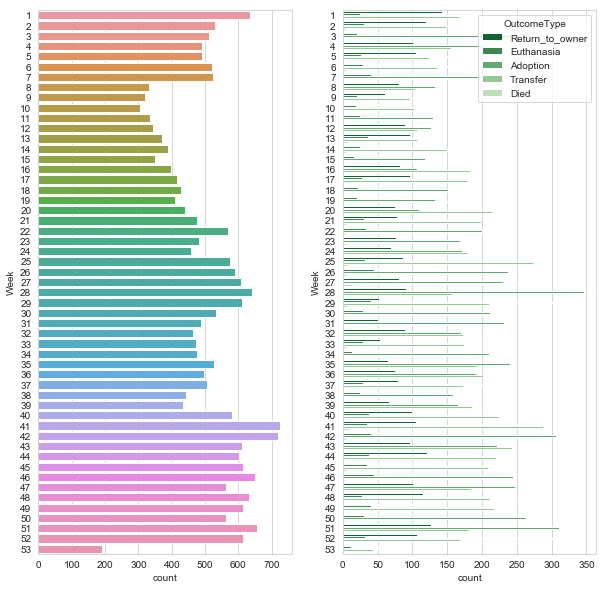

In [42]:
fig,ax =  plt.subplots(ncols=2, figsize = (10, 10))

sns.countplot(y= 'Week', data= df_train, ax = ax[0])
sns.countplot(y= 'Week', hue = 'OutcomeType',
             data= df_train, ax = ax[1])

Como vimos anteriormente, os meses finais e janeiro é onde se acumula a maior quantidade de registros e consequentimente as semanas tambem, mas observe a semana final, é a semana que tem menos registros, o que faz sentido, já q nesse periodo, as pessoas dão preferencias a outras coisas 


Em uma discussao, o grupo percebeu que a quantidade de registros na ultima semana do ano é muito baixa, pois tinhamos impressoes que uma boa quantidade de pessoas presenteia outras pessoas com animais, entao chegamos a duas conclusões:

1 - As pessoas que vao presentear com animais, elas acabam indo com antecedencia ate chegar a data ideal para entregar a pessoa desejada

2 - Final do ano, as pessoas preferem comprar animais do que adotar

Ao mencionar a conclusao 2, tivemos o gatilho de pegar um dataset de compra de animais para comparar os registros, mas ate agora nao achamos nenhum, entao fica registrado aqui a ideia que infelizmente vai ter q ser descartada 

### Hora de fazer mais pré-processamento

In [43]:
num_var = df_train.select_dtypes(include=['int64', 'float64']).columns
categ_var = df_train.select_dtypes(include=['object']).drop(['OutcomeType'], axis=1).columns
dummy_columns = pd.get_dummies(df_train[categ_var])
df_final = pd.concat([dummy_columns, df_train],axis=1)

In [44]:
df_final = df_final.drop(['AnimalType', 'BreedType', 'SexuponOutcome', 'HasName', 'MultiColors','Porte','Temperamento'],
                         axis = 1)
df_final.tail()

,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Porte_Giant,Porte_Large,Porte_Medium,...,BreedType_pure,OutcomeType,AgeuponOutcome,Year,Month,Day,Hour,WeekDay,Min,Week
26724,1,0,0,1,0,0,0,0,1,0,...,0,Transfer,30,2015,5,14,11,3,56,20
26725,1,0,0,0,0,1,0,0,0,0,...,0,Transfer,90,2016,1,20,18,2,59,3
26726,0,1,0,0,1,0,0,0,0,0,...,0,Adoption,1460,2015,3,9,13,0,33,11
26727,1,0,0,1,0,0,0,0,0,0,...,0,Transfer,28,2014,4,27,12,6,22,17
26728,1,0,0,1,0,0,0,0,0,0,...,0,Transfer,365,2015,7,2,9,3,0,27


In [45]:
print(df_final.nunique())

AnimalType_Cat                   2
AnimalType_Dog                   2
SexuponOutcome_Intact Female     2
SexuponOutcome_Intact Male       2
SexuponOutcome_Neutered Male     2
SexuponOutcome_Spayed Female     2
SexuponOutcome_Unknown           2
Porte_Giant                      2
Porte_Large                      2
Porte_Medium                     2
Porte_Mini                       2
Porte_Small                      2
Temperamento_Bustling            2
Temperamento_Calm                2
Temperamento_Reserved            2
HasName_False                    2
HasName_True                     2
MultiColors_False                2
MultiColors_True                 2
BreedType_mix                    2
BreedType_pure                   2
OutcomeType                      5
AgeuponOutcome                  44
Year                             4
Month                           12
Day                             31
Hour                            20
WeekDay                          7
Min                 

### Quebrar os dados em conjunto de treino e conjunto de teste

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Definindo X e Y (nossa variavel alvo)
X = df_final.drop(['OutcomeType'], axis= 1)
y = df_train['OutcomeType']

In [48]:
# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

In [49]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (18710, 29)
Tamanho de X_test:  (8019, 29)
Tamanho de y_train:  (18710,)
Tamanho de y_test:  (8019,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [50]:
# Importando os algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [51]:
# Instanciando os algoritmos
tree = DecisionTreeClassifier(random_state=1)
svm = LinearSVC(random_state=1)
nb = GaussianNB()
mlp = MLPClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1, n_estimators= 2500)
lrcv = LogisticRegressionCV(random_state=1)

In [52]:
# Treinando os modelos com seus parametros padroes
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lrcv.fit(X_train, y_train)

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
# Arvore de Decisão fazendo previsoes e vendo sua performance
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.5987030801845616

In [55]:
# Support Vector Machine fazendo previsoes e vendo sua performance

y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.5811198403790996

In [56]:
# Naive Bayes fazendo previsoes e vendo sua performance

y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6176580621025065

In [57]:
# Multiple Layer Perceptron fazendo previsoes e vendo sua performance

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.6366130440204514

In [58]:
# Random Forest fazendo previsoes e vendo sua performance

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6825040528744233

In [59]:
# Regressao Logistica fazendo previsoes e vendo sua performance

y_pred = lrcv.predict(X_test)
accuracy_score(y_test, y_pred)

0.6386083052749719

Agora vamos observar a acuracia entre dados de treino e de teste de cada modelo e sua respectiva confusion matrix

In [60]:
y_train_true = y_train
y_train_pred = tree.predict(X_train)
y_test_true = y_test
y_test_pred = tree.predict(X_test)

print(f"Acurácia em Dados de Treino com Arvore de Decisão: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Arvore de Decisão: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Arvore de Decisão: 1.0

 ---------------------------

Acurácia em Dados de Teste com Arvore de Decisão: 0.6


In [61]:
confusion_matrix(y_test_true, y_test_pred)

array([[2169,    8,   75,  518,  466],
       [   3,    6,   10,    5,   29],
       [  59,   15,  136,   85,  149],
       [ 485,    3,   88,  587,  297],
       [ 437,   39,  173,  274, 1903]], dtype=int64)

In [62]:
y_train_true = y_train
y_train_pred = svm.predict(X_train)
y_test_true = y_test
y_test_pred = svm.predict(X_test)

print(f"Acurácia em Dados de Treino com Support Vector Machine: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Support Vector Machine: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Support Vector Machine: 0.58

 ---------------------------

Acurácia em Dados de Teste com Support Vector Machine: 0.58


In [63]:
confusion_matrix(y_test_true, y_test_pred)

array([[2044,    0,    0,  534,  658],
       [   4,    0,    0,    8,   41],
       [  39,    0,    0,  213,  192],
       [ 559,    0,    0,  797,  104],
       [ 534,    0,    0,  473, 1819]], dtype=int64)

In [64]:
y_train_true = y_train
y_train_pred = nb.predict(X_train)
y_test_true = y_test
y_test_pred = nb.predict(X_test)

print(f"Acurácia em Dados de Treino com Naive Bayes: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Naive Bayes: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Naive Bayes: 0.62

 ---------------------------

Acurácia em Dados de Teste com Naive Bayes: 0.62


In [65]:
confusion_matrix(y_test_true, y_test_pred)

array([[2627,    0,    8,  497,  104],
       [   4,    2,    3,    6,   38],
       [  88,    5,   49,  116,  186],
       [ 671,    1,    7,  740,   41],
       [ 784,   38,   37,  432, 1535]], dtype=int64)

In [66]:
y_train_true = y_train
y_train_pred = mlp.predict(X_train)
y_test_true = y_test
y_test_pred = mlp.predict(X_test)

print(f"Acurácia em Dados de Treino com Multiple Layer Perceptron: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Multiple Layer Perceptron: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Multiple Layer Perceptron: 0.64

 ---------------------------

Acurácia em Dados de Teste com Multiple Layer Perceptron: 0.64


In [67]:
confusion_matrix(y_test_true, y_test_pred)

array([[2935,    0,    0,  149,  152],
       [   7,    0,    2,    2,   42],
       [ 131,    0,   28,   55,  230],
       [ 986,    0,    0,  289,  185],
       [ 834,    0,   20,  119, 1853]], dtype=int64)

In [68]:
y_train_true = y_train
y_train_pred = rfc.predict(X_train)
y_test_true = y_test
y_test_pred = rfc.predict(X_test)

print(f"Acurácia em Dados de Treino com Random Forest: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Random Forest: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Random Forest: 1.0

 ---------------------------

Acurácia em Dados de Teste com Random Forest: 0.68


In [69]:
confusion_matrix(y_test_true, y_test_pred)

array([[2759,    0,    3,  277,  197],
       [   5,    0,    6,    5,   37],
       [  74,    0,   71,   99,  200],
       [ 651,    0,    4,  617,  188],
       [ 532,    0,   29,  239, 2026]], dtype=int64)

In [70]:
y_train_true = y_train
y_train_pred = lrcv.predict(X_train)
y_test_true = y_test
y_test_pred = lrcv.predict(X_test)

print(f"Acurácia em Dados de Treino com Regressão Logistica: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Regressão Logistica: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Regressão Logistica: 0.64

 ---------------------------

Acurácia em Dados de Teste com Regressão Logistica: 0.64


In [71]:
confusion_matrix(y_test_true, y_test_pred)

array([[2844,    0,    3,  198,  191],
       [   5,    0,    1,    3,   44],
       [  90,    0,   10,   69,  275],
       [ 861,    0,    1,  399,  199],
       [ 824,    0,    8,  126, 1868]], dtype=int64)

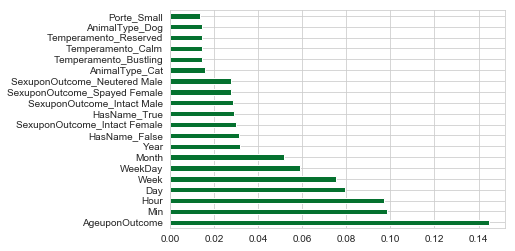

In [72]:
# Vendo quais variaveis sao as mais importantes
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

CONCLUSÃO: Vimos que tivemos um resultado nada agradavel, apos fazer diversas combinações o máxico que chegamos foi 68% de accuracy, entao nosso modelo ta um pouco melhor do que uma moeda